# 1. Importar bibliotecas necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 2. Cargar el conjunto de datos Iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# 3. Dividir el conjunto de datos en conjuntos de entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 4. Crear un árbol de decisión

In [4]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 5. Realizar predicciones

In [5]:
y_pred = clf.predict(X_test)

# 6. Evaluar el modelo

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 1.00


# 7. Imprimir el informe de clasificación

In [7]:
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred, target_names=target_names))


Informe de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# 8. Matriz de confusión

In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:\n", conf_matrix)


Matriz de confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# 9. Visualizar el árbol de decisión

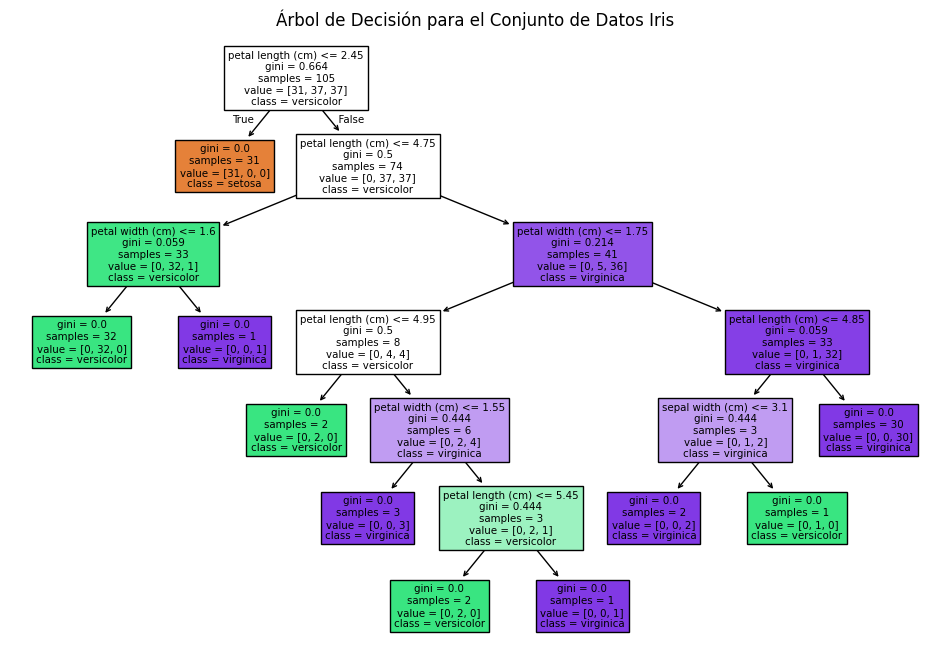

In [9]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Árbol de Decisión para el Conjunto de Datos Iris")
plt.show()

# 10. Análisis de importancia de características

In [10]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# 11. Visualizar la importancia de las características

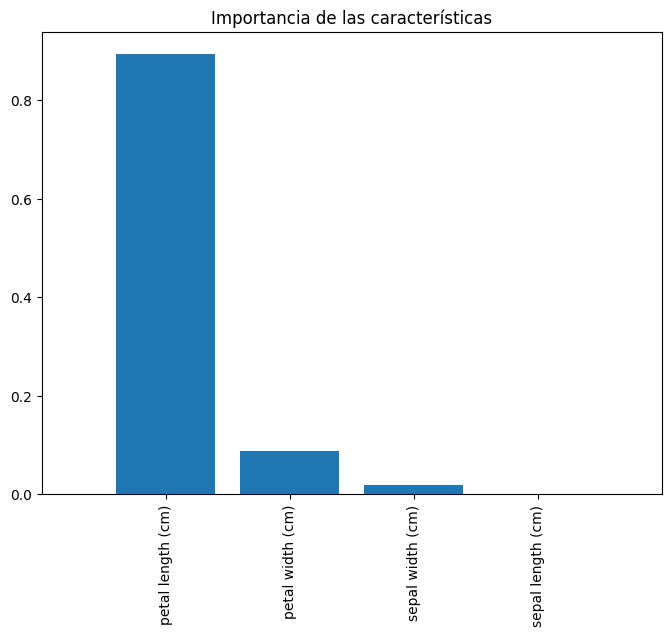

In [11]:
plt.figure(figsize=(8,6))
plt.title("Importancia de las características")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()